# Problem Statement I

# **Business Understanding**

---

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the necessary modules
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

# **Business Objectives**

---

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

In [3]:
#Reading the application_data file
inp0 = pd.read_csv('application_data.csv')

# **Data Understanding**

---

This dataset has 3 files as explained below: 

111
1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.


2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.


3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [4]:
#Checking the number of rows and columns
inp0.shape

(307511, 122)

In [5]:
#Creating a variable to store the columns names which has more than 30% NULL values
emptyCol = inp0.isnull().sum()
emptyCol=emptyCol[emptyCol.values>(0.3*len(emptyCol))]
len(emptyCol)

64

In [6]:
#Dropping those columns whose data has more than 30% NULL values
emptyCol = list(emptyCol[emptyCol.values>=0.3].index)
inp0.drop(labels=emptyCol,axis=1,inplace=True)
print(len(emptyCol))

64


In [7]:
#Checking NULL values % in remaining columns
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


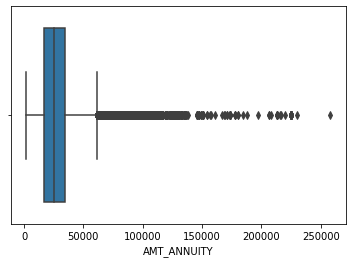

In [8]:
#Plotting AMT_ANNUITY using box plot to check for any outliners since it has 0.00392% of NULL Values
sns.boxplot(inp0.AMT_ANNUITY)

Since AMT_ANNUITY column has very few null valued rows, we will impute the missing values

In [9]:
#Replacing those NULL Values with the median values for that column
values=inp0['AMT_ANNUITY'].median()

inp0.loc[inp0['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [10]:
inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [11]:
#Checking for rows to be having more than 30% NULL values
emptyrow=inp0.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(inp0)].index)
inp0.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [12]:
#Dropping unwanted columns which does not effect the analysis
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp0.drop(labels=unwanted,axis=1,inplace=True)

Some columns has values mentioned as 'XNA' which means 'Not Available'. We need to find those and either replace or remove those values.

In [13]:
#Checking for junk values other thatn NA present in CODE_GENDER column
inp0[inp0['CODE_GENDER']=='XNA'].shape

(4, 28)

In [14]:
#Checking for junk values other thatn NA present in ORGANIZATION_TYPE column
inp0[inp0['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [15]:
inp0['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since majority of the values are F(Female), we will replace the XNA values, which are present only in 4, with "F"

In [16]:
inp0.loc[inp0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [17]:
inp0.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

Since the count of XNA values in ORGANIZATION_TYPE is large, replacing it with other values would effect our analysis, so we will be dropping those rows

In [18]:
inp0=inp0.drop(inp0.loc[inp0['ORGANIZATION_TYPE']=='XNA'].index)
inp0[inp0['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

Marking the columns which has numeric values and changing the object-type of those columns to numeric

In [19]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [20]:
inp0[numeric_columns]=inp0[numeric_columns].apply(pd.to_numeric)
inp0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


Creating bins with custom buckets ranges for AMT_INCOME_TOTAL

In [21]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],bins,labels=slot)

Creating bins with custom buckets ranges for AMT_CREDIT

In [22]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=bins,labels=slots)

Now, we divide the dataset into 2 parts - 

1.   target1_df: contains client with payment difficulties
2.   target0_df: the remaining clients



In [23]:
target0_df=inp0.loc[inp0["TARGET"]==0]
target1_df=inp0.loc[inp0["TARGET"]==1]

In [24]:
round(len(target0_df)/len(target1_df),2) #Imbalance ratio

10.55

# **Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [40]:
#Creating an user-defined function to plot graphs
def uniplot(inp0,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(inp0[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = inp0, x= col, order=inp0[col].value_counts().index,hue = hue,palette='deep') 
        
    plt.show()

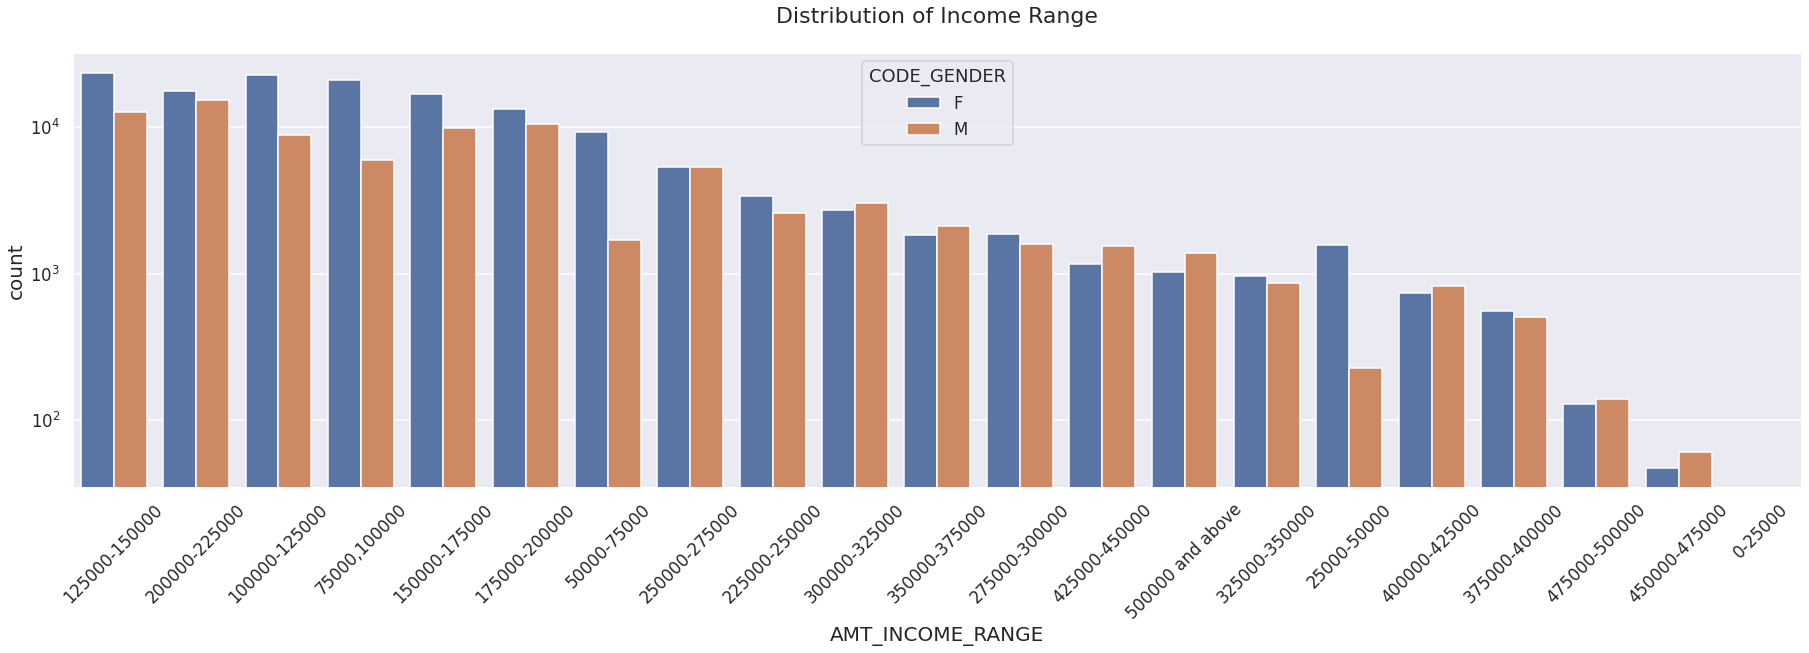

In [41]:
uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of Income Range',hue='CODE_GENDER')


1.   Female counts are higher than male.
2.   Income range from 100000 to 200000 is having more number of credits.
3. Very less count for income range 400000 and above



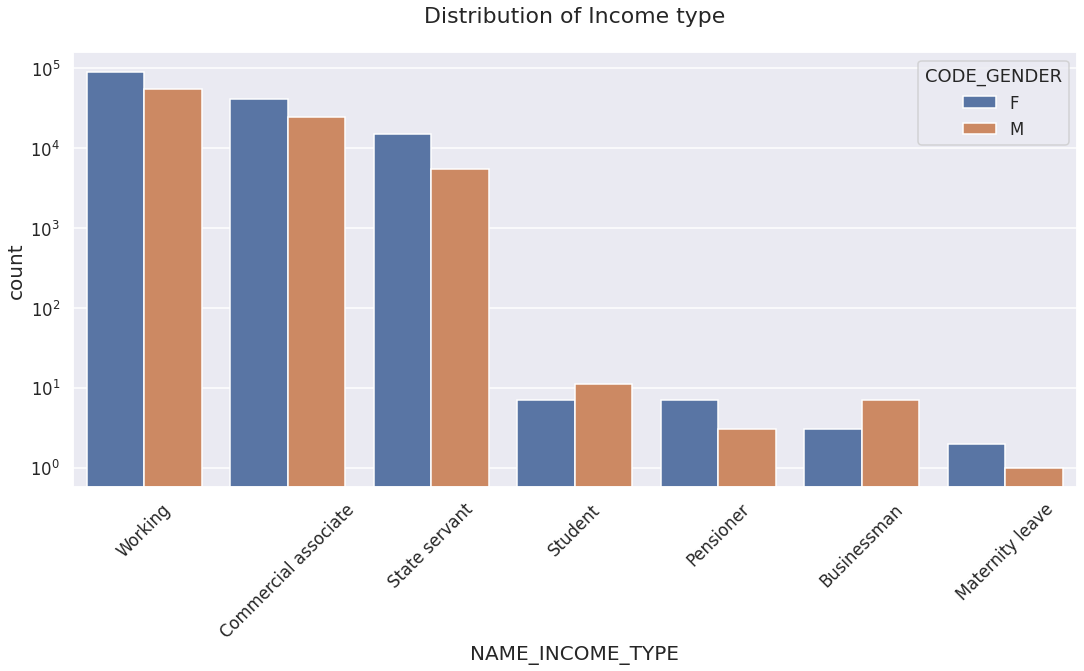

In [42]:
uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


1. For income type ‘working’, 'commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

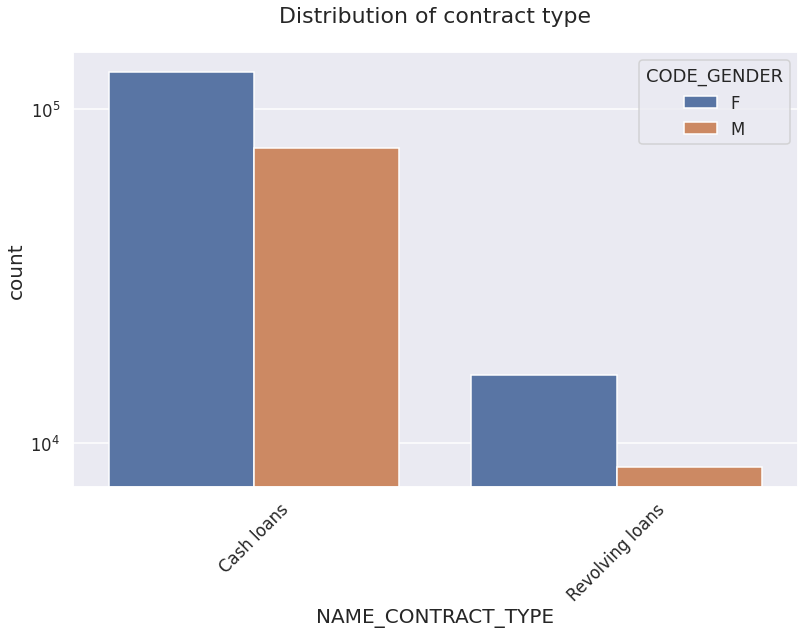

In [43]:
uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

Ploting horizontal bar graph for Organization Type of Target-0

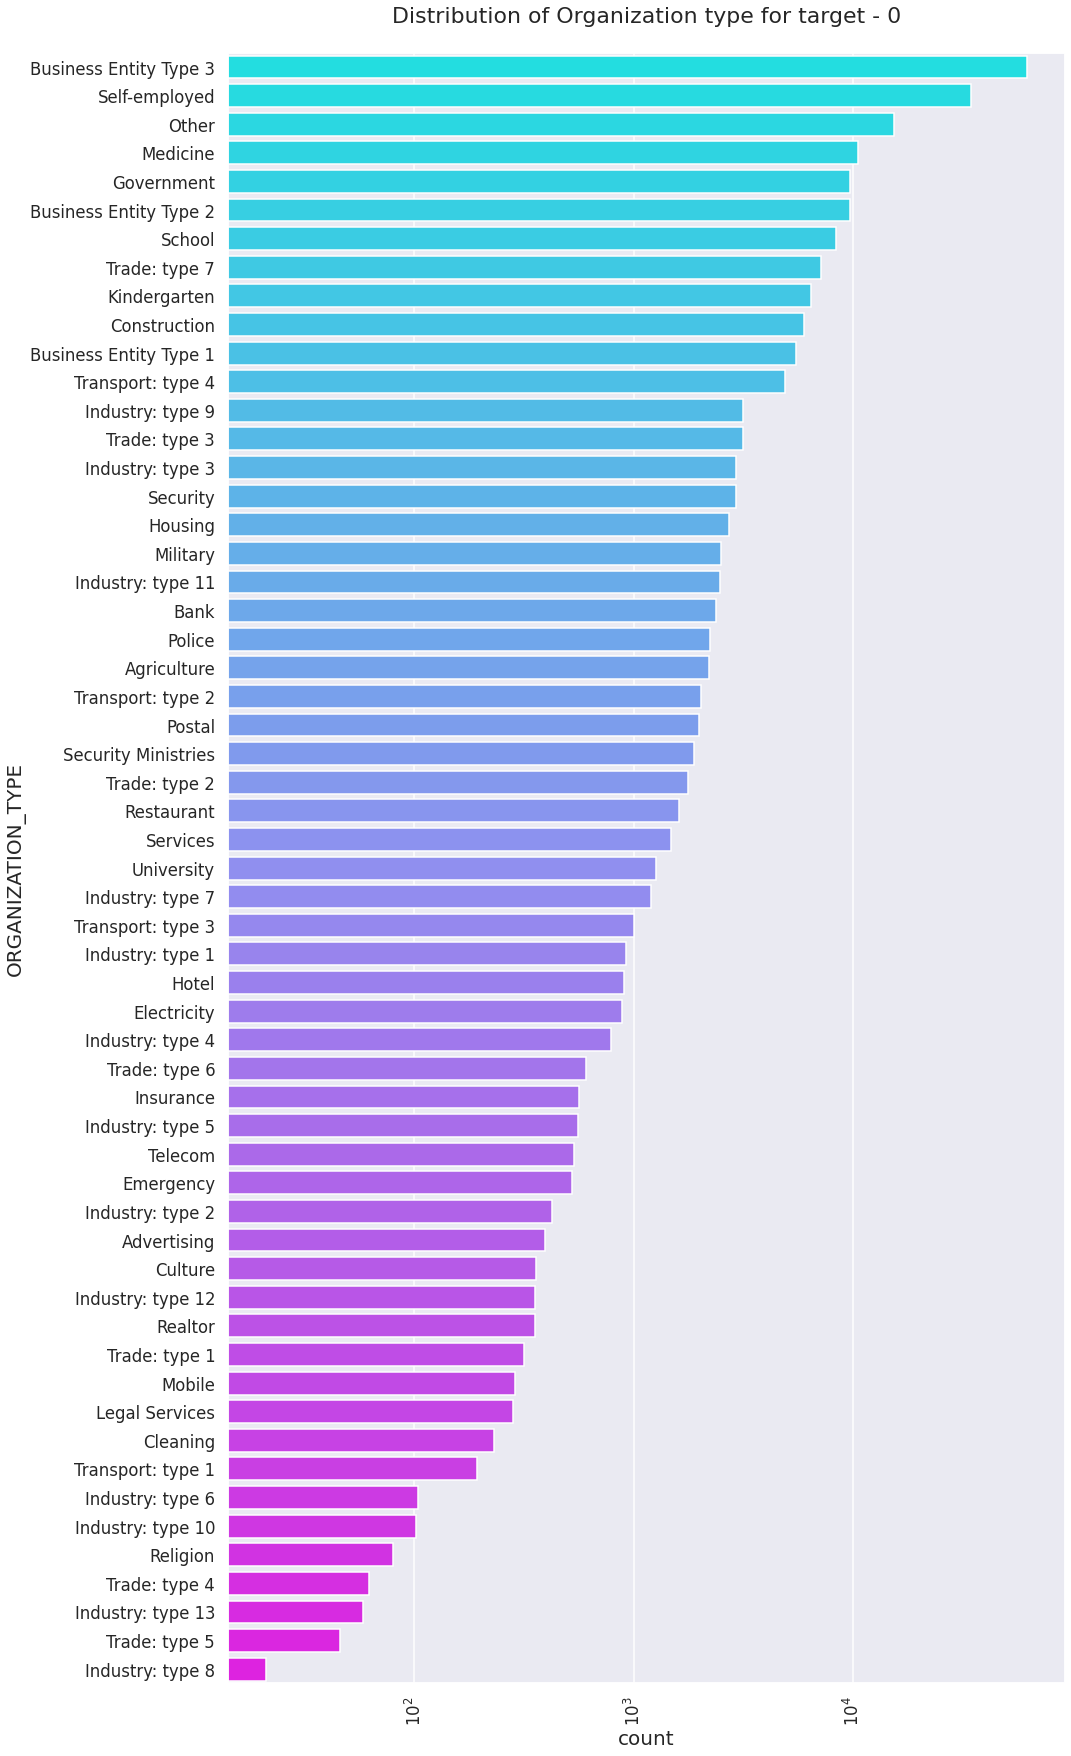

In [46]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

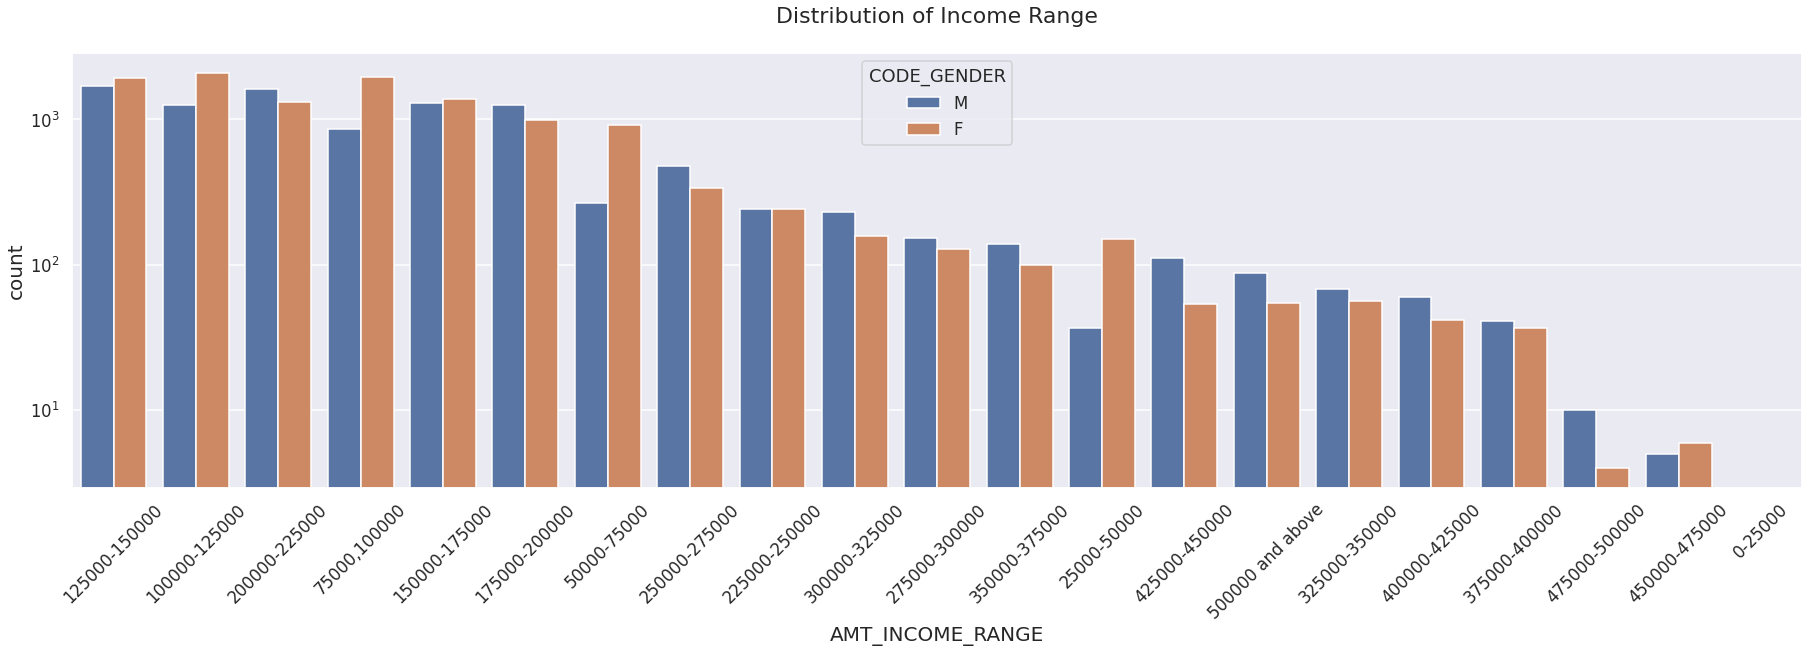

In [47]:
uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of Income Range',hue='CODE_GENDER')


1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

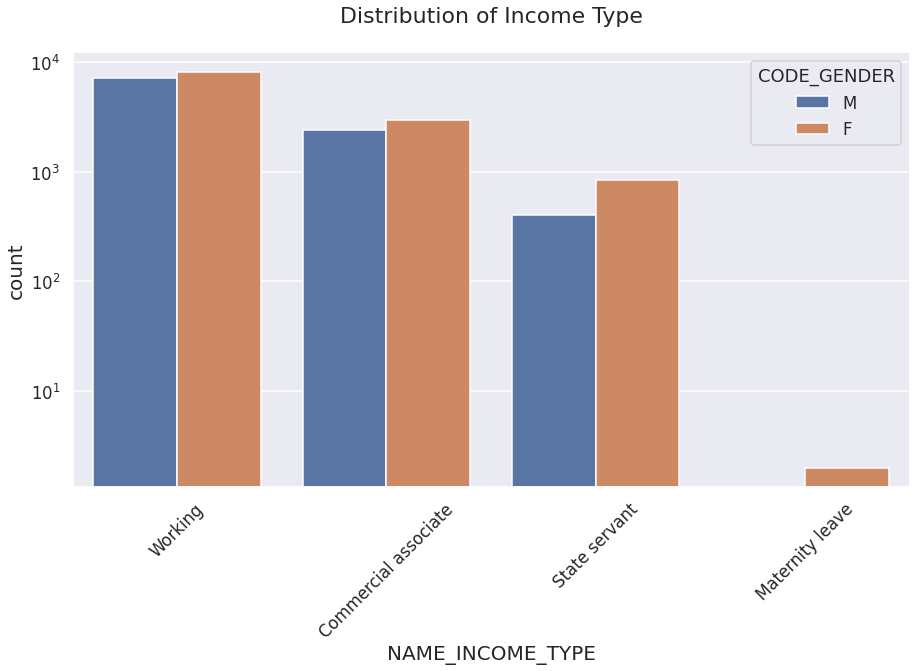

In [48]:
uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income Type',hue='CODE_GENDER')


1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

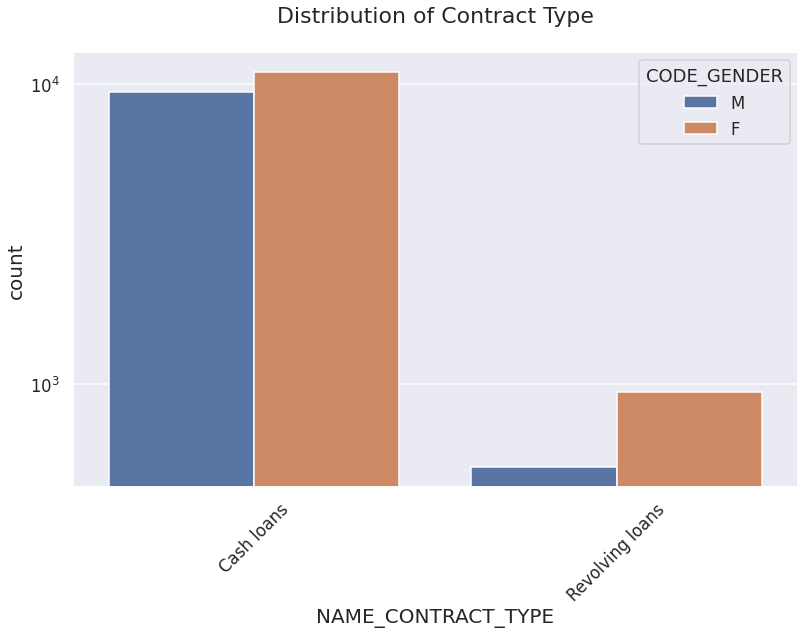

In [50]:
uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of Contract Type',hue='CODE_GENDER')


1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

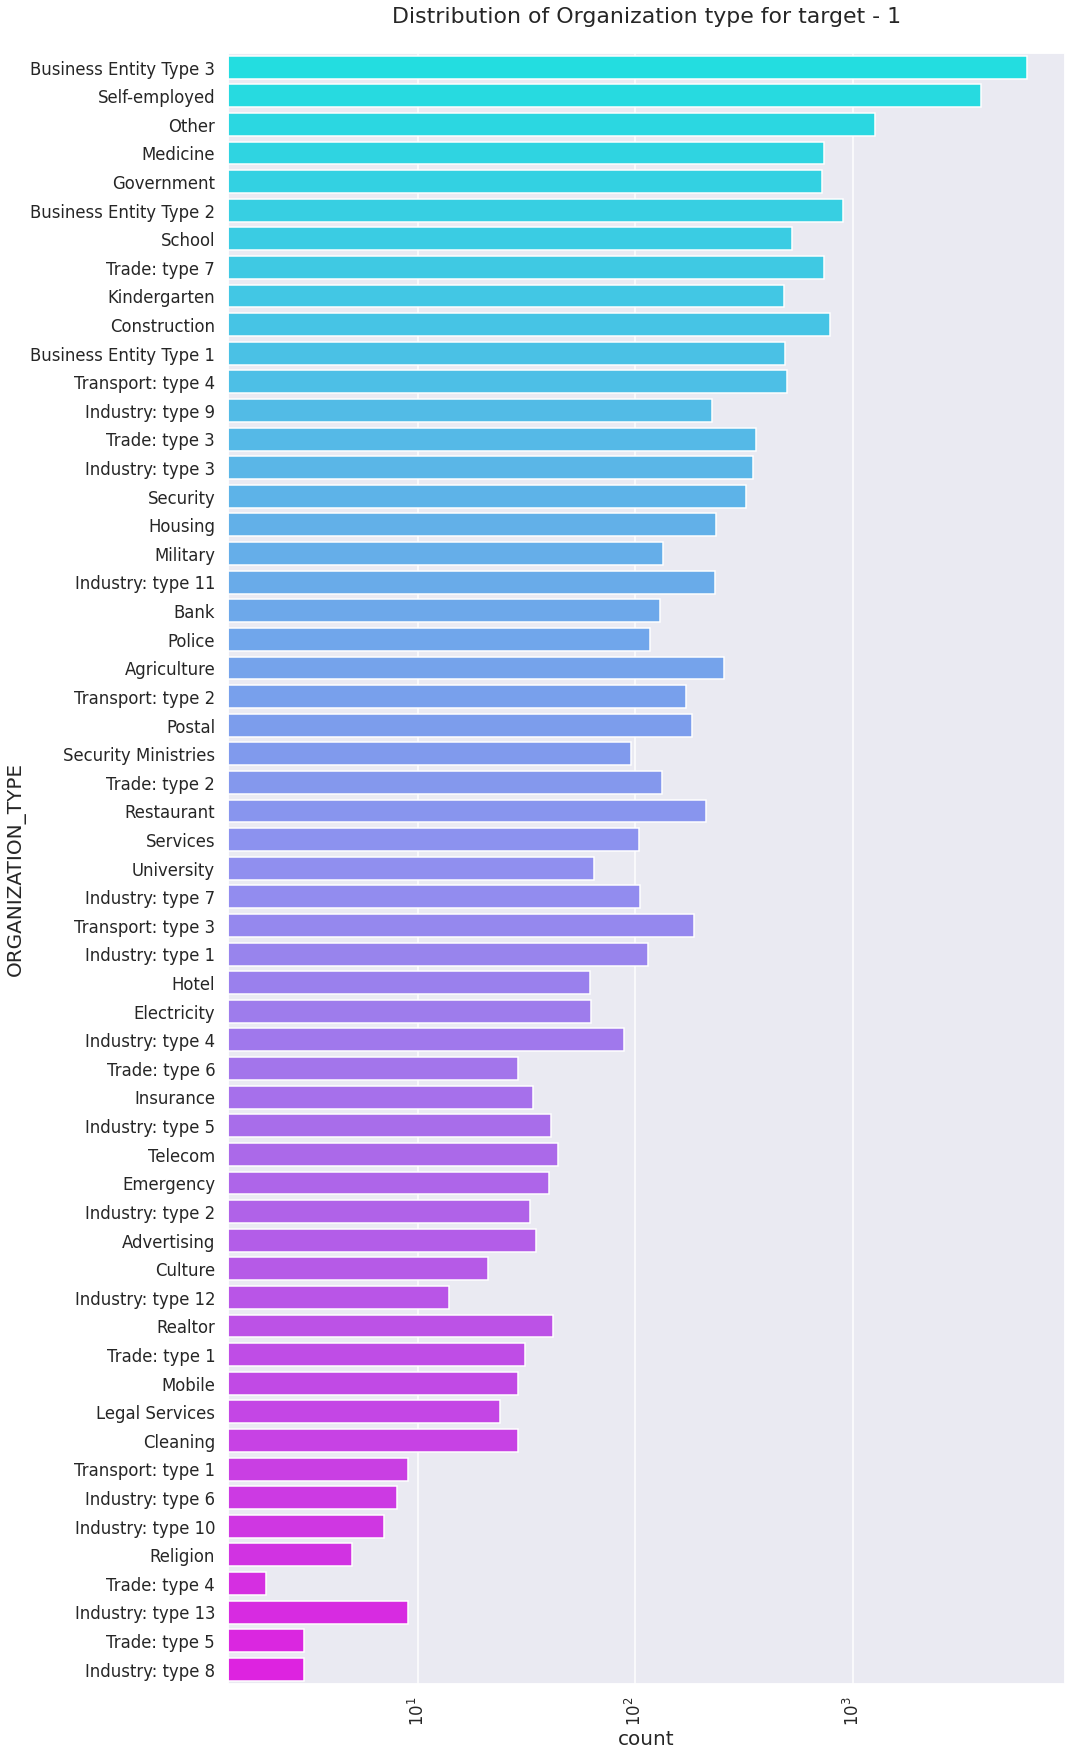

In [51]:
# Plotting for Organization type of Target-1

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [52]:
# Finding correlation of the numeric colums between target 0 and 1
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [53]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [54]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


We will now plot heat maps for both the targets correlation for better visualization

In [61]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False) #here annot is made false as the graph will be conjusted with the numbered values and visual will be messed up

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()


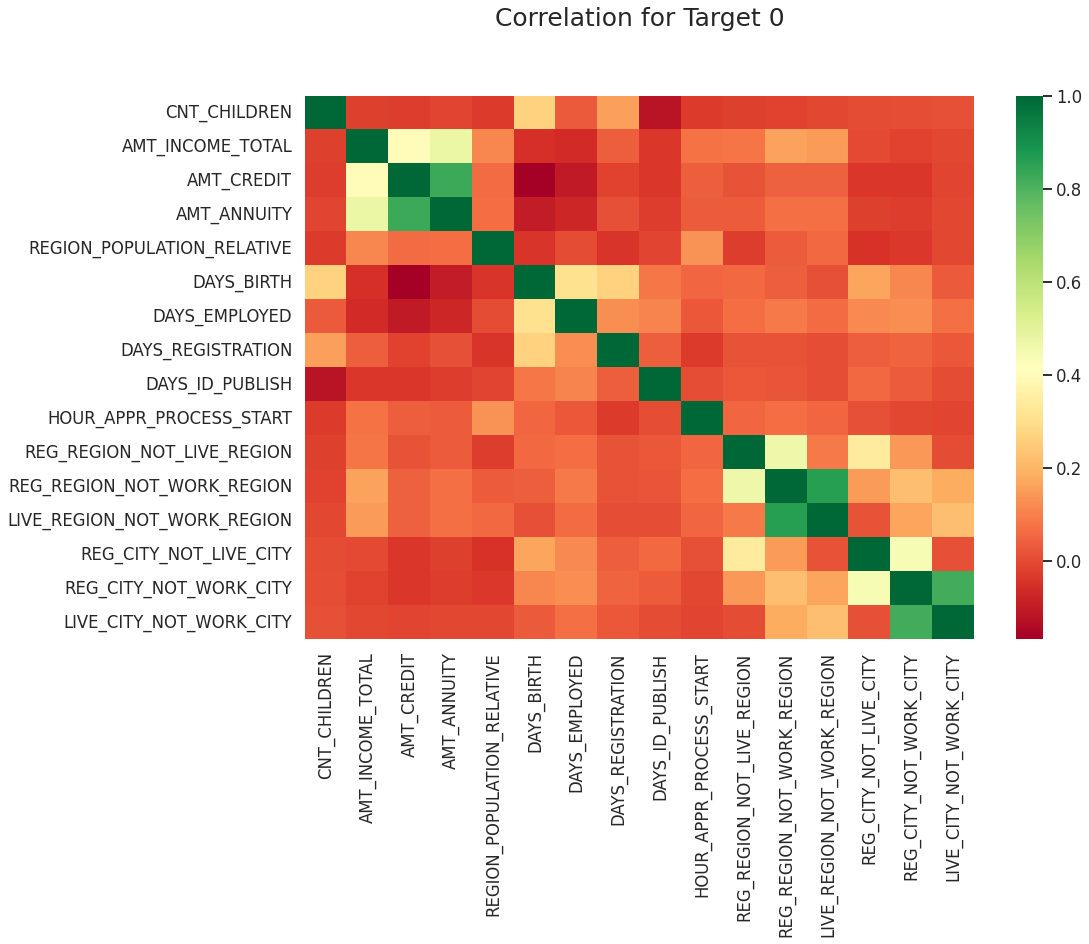

In [63]:
targets_corr(data=target0,title='Correlation for Target 0')

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

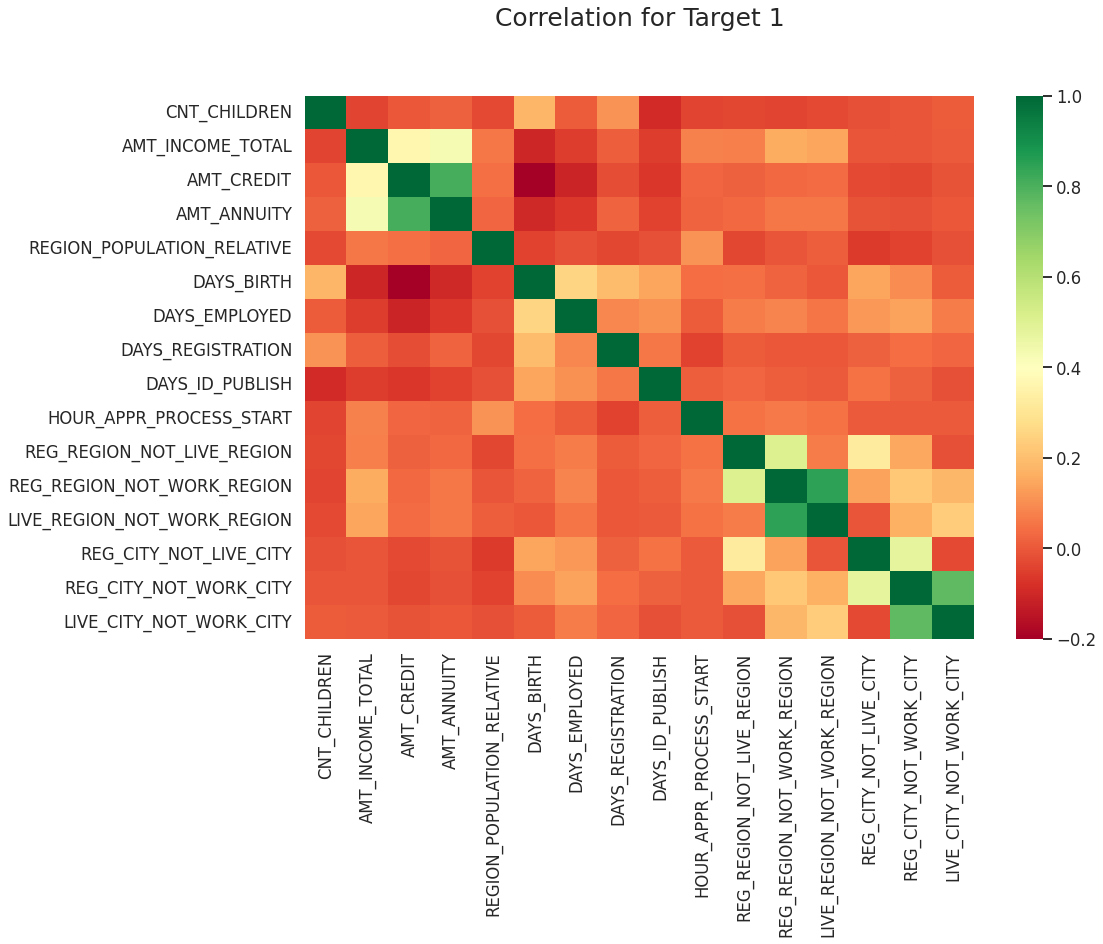

In [64]:
targets_corr(data=target1,title='Correlation for Target 1')

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

# **Univariate analysis for variables**

In [113]:
def univariate_numerical(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('linear')
    sns.boxplot(data=data, x=col,orient='h')
    plt.show()

**For Target 0 - Checking for Outliners**

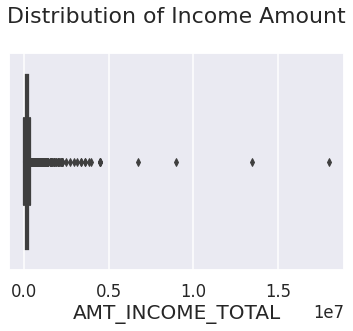

In [114]:
univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of Income Amount')


In [107]:
target0_df.AMT_INCOME_TOTAL.describe()

count    2.303020e+05
mean     1.764984e+05
std      1.154998e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.160000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.

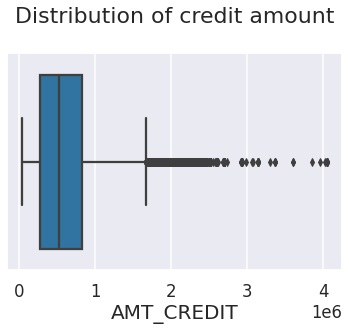

In [115]:
univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')


In [108]:
target0_df.AMT_CREDIT.describe()

count    2.303020e+05
mean     6.164879e+05
std      4.114378e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.353800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

1. Some outliners are noticed in credit amount
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

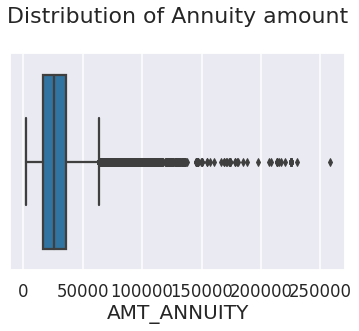

In [116]:
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')


In [109]:
target0_df.AMT_ANNUITY.describe()

count    230302.000000
mean      27902.554759
std       14833.644504
min        1980.000000
25%       16969.500000
50%       25843.500000
75%       35743.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

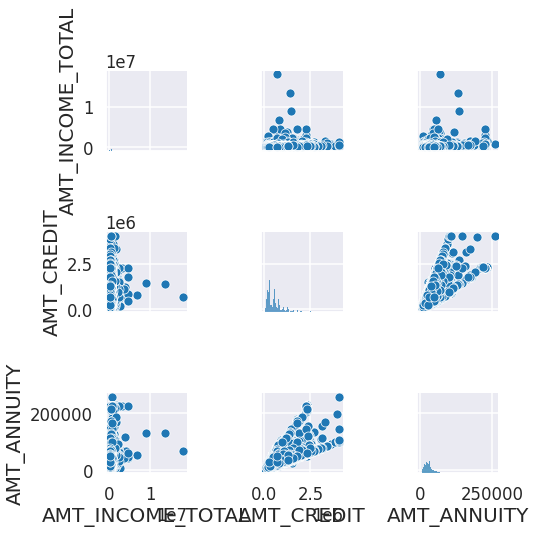

In [100]:
sns.pairplot(data=target0_df, vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY'])

**For Target 1 - Checking for Outliners**

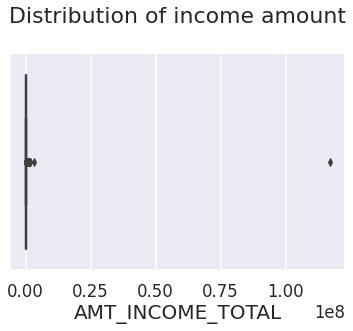

In [117]:
univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')


In [118]:
target1_df.AMT_INCOME_TOTAL.describe()

count    2.183500e+04
mean     1.697506e+05
std      7.956149e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.

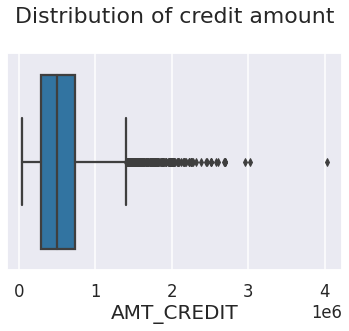

In [119]:
univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')


In [111]:
target1_df.AMT_CREDIT.describe()

count    2.183500e+04
mean     5.577178e+05
std      3.460483e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.959855e+05
75%      7.290000e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

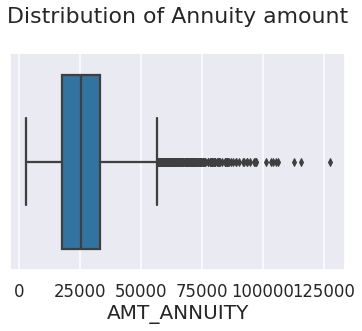

In [120]:
univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')


In [112]:
target1_df.AMT_ANNUITY.describe()

count     21835.000000
mean      26859.040669
std       12476.177108
min        2844.000000
25%       17732.250000
50%       25578.000000
75%       33394.500000
max      127507.500000
Name: AMT_ANNUITY, dtype: float64

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

# **Bivariate analysis for numerical variables**

**For Target 0**

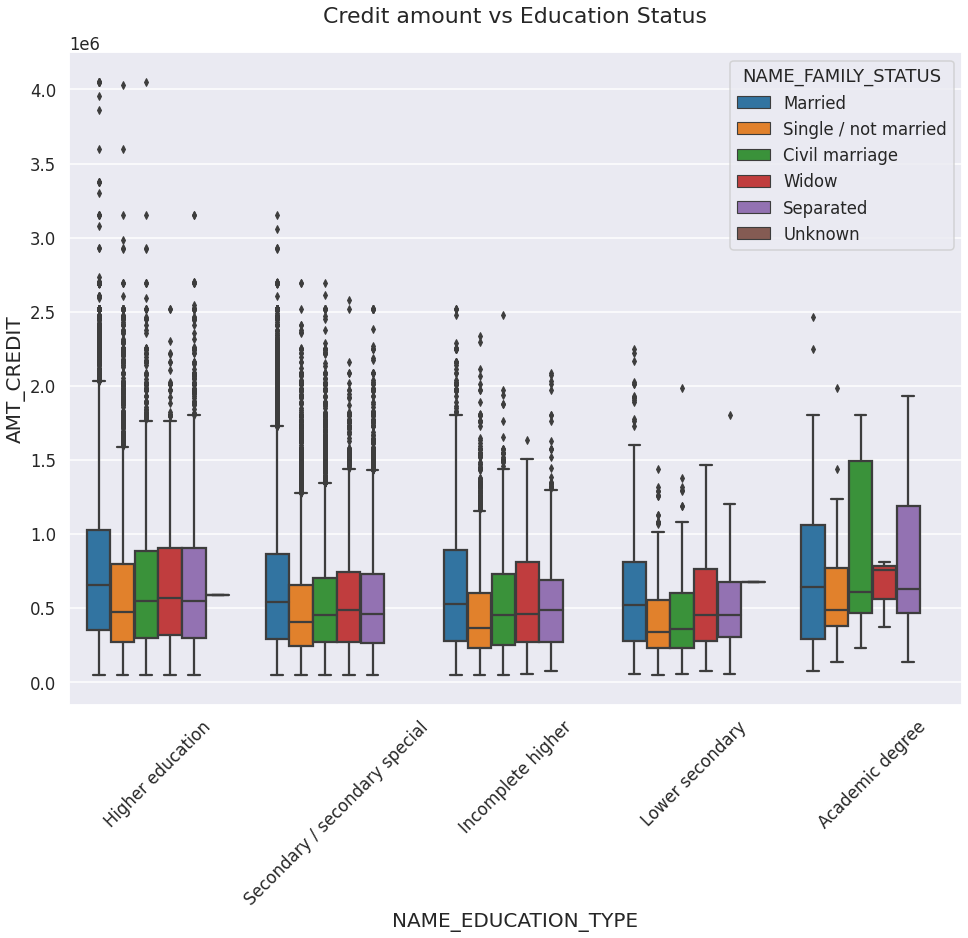

In [80]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()


we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

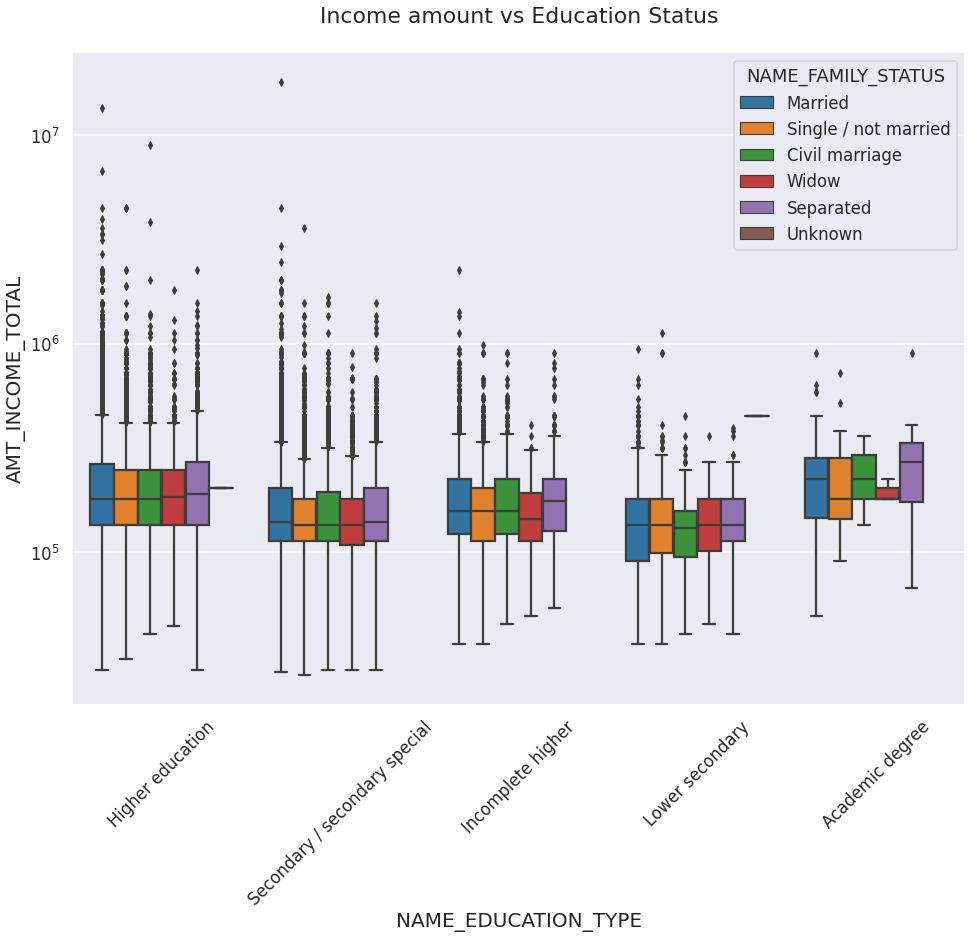

In [81]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

For Target 1

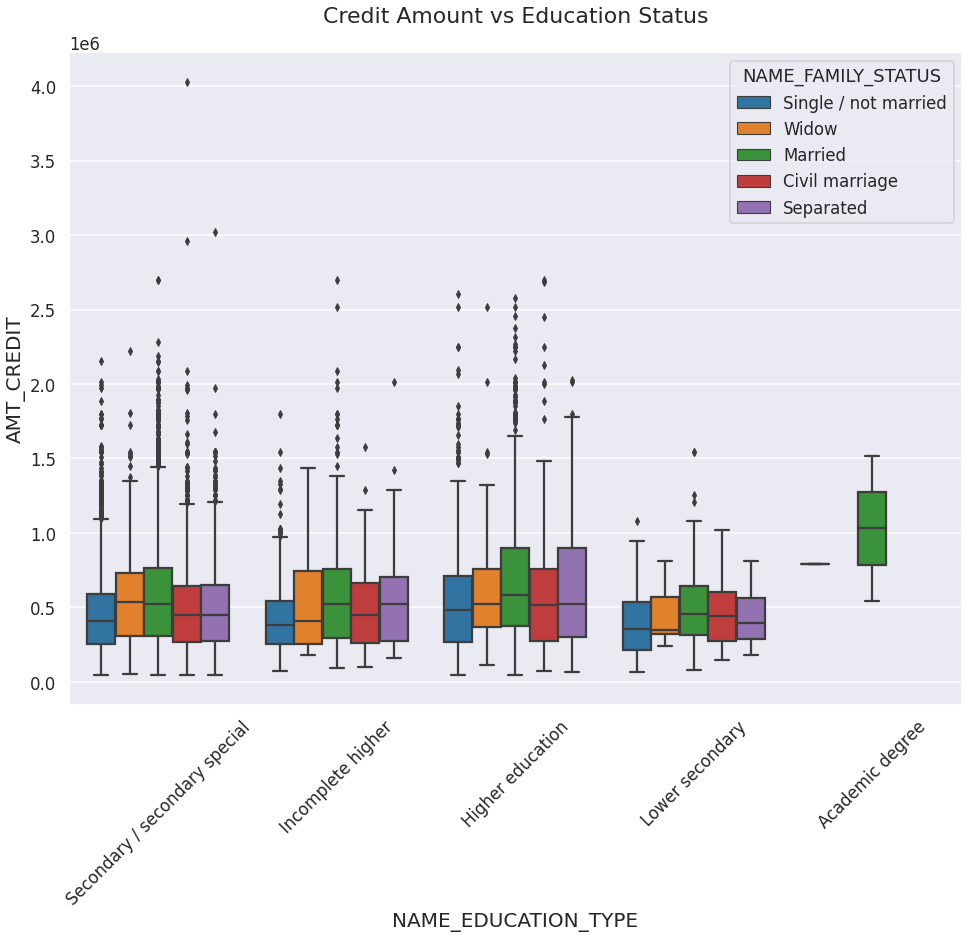

In [82]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

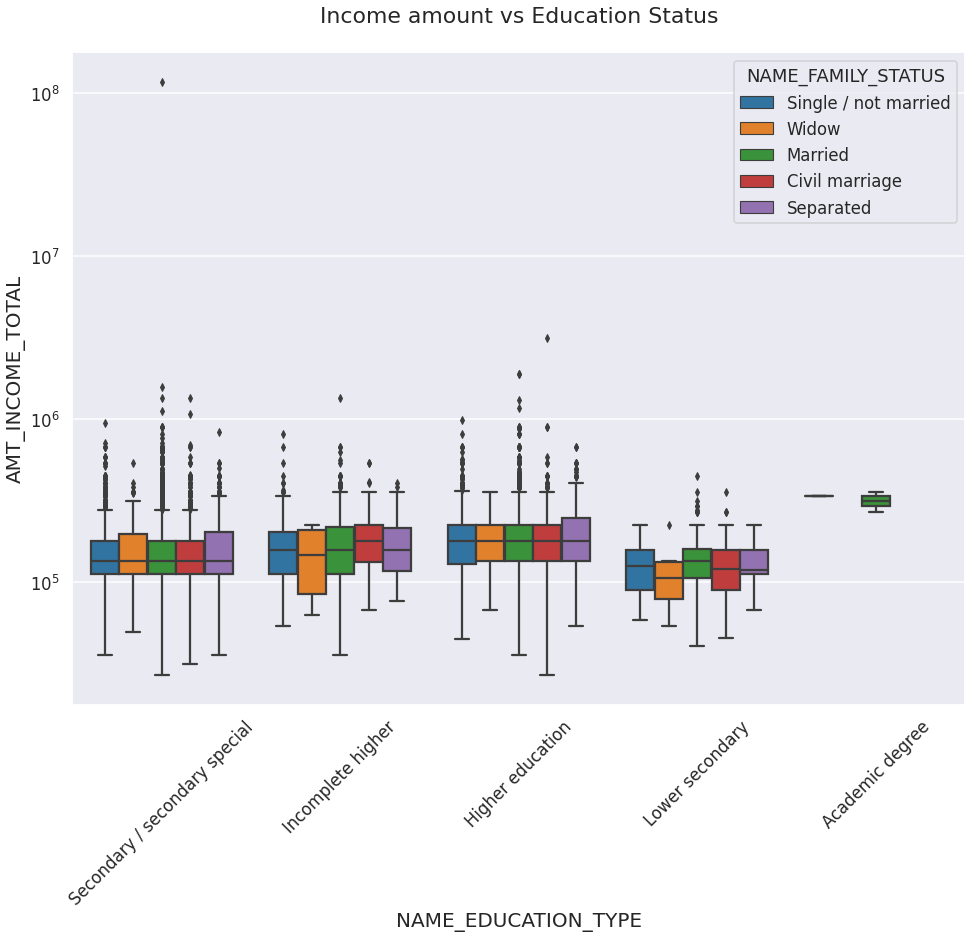

In [86]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

# **Checking the previous_application_data**

In [84]:
# Reading the previous application list
inp1 = pd.read_csv('previous_application.csv')

**Cleaning the missing data in rows and columns**

In [87]:
emptycol1=inp1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [88]:
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
inp1.drop(labels=emptycol1,axis=1,inplace=True)

inp1.shape

(1670214, 22)

In [89]:
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

inp1.shape

(69635, 22)

Now that the other file is cleaned up, we will merge the two datasets into a single new dataset

In [90]:
new_df=pd.merge(left=inp0,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')


Renaming the columns for better clarity

In [91]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


Dropping the unwanted columns in this new dataset

In [92]:
new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)


# **Performing univariate analysis**

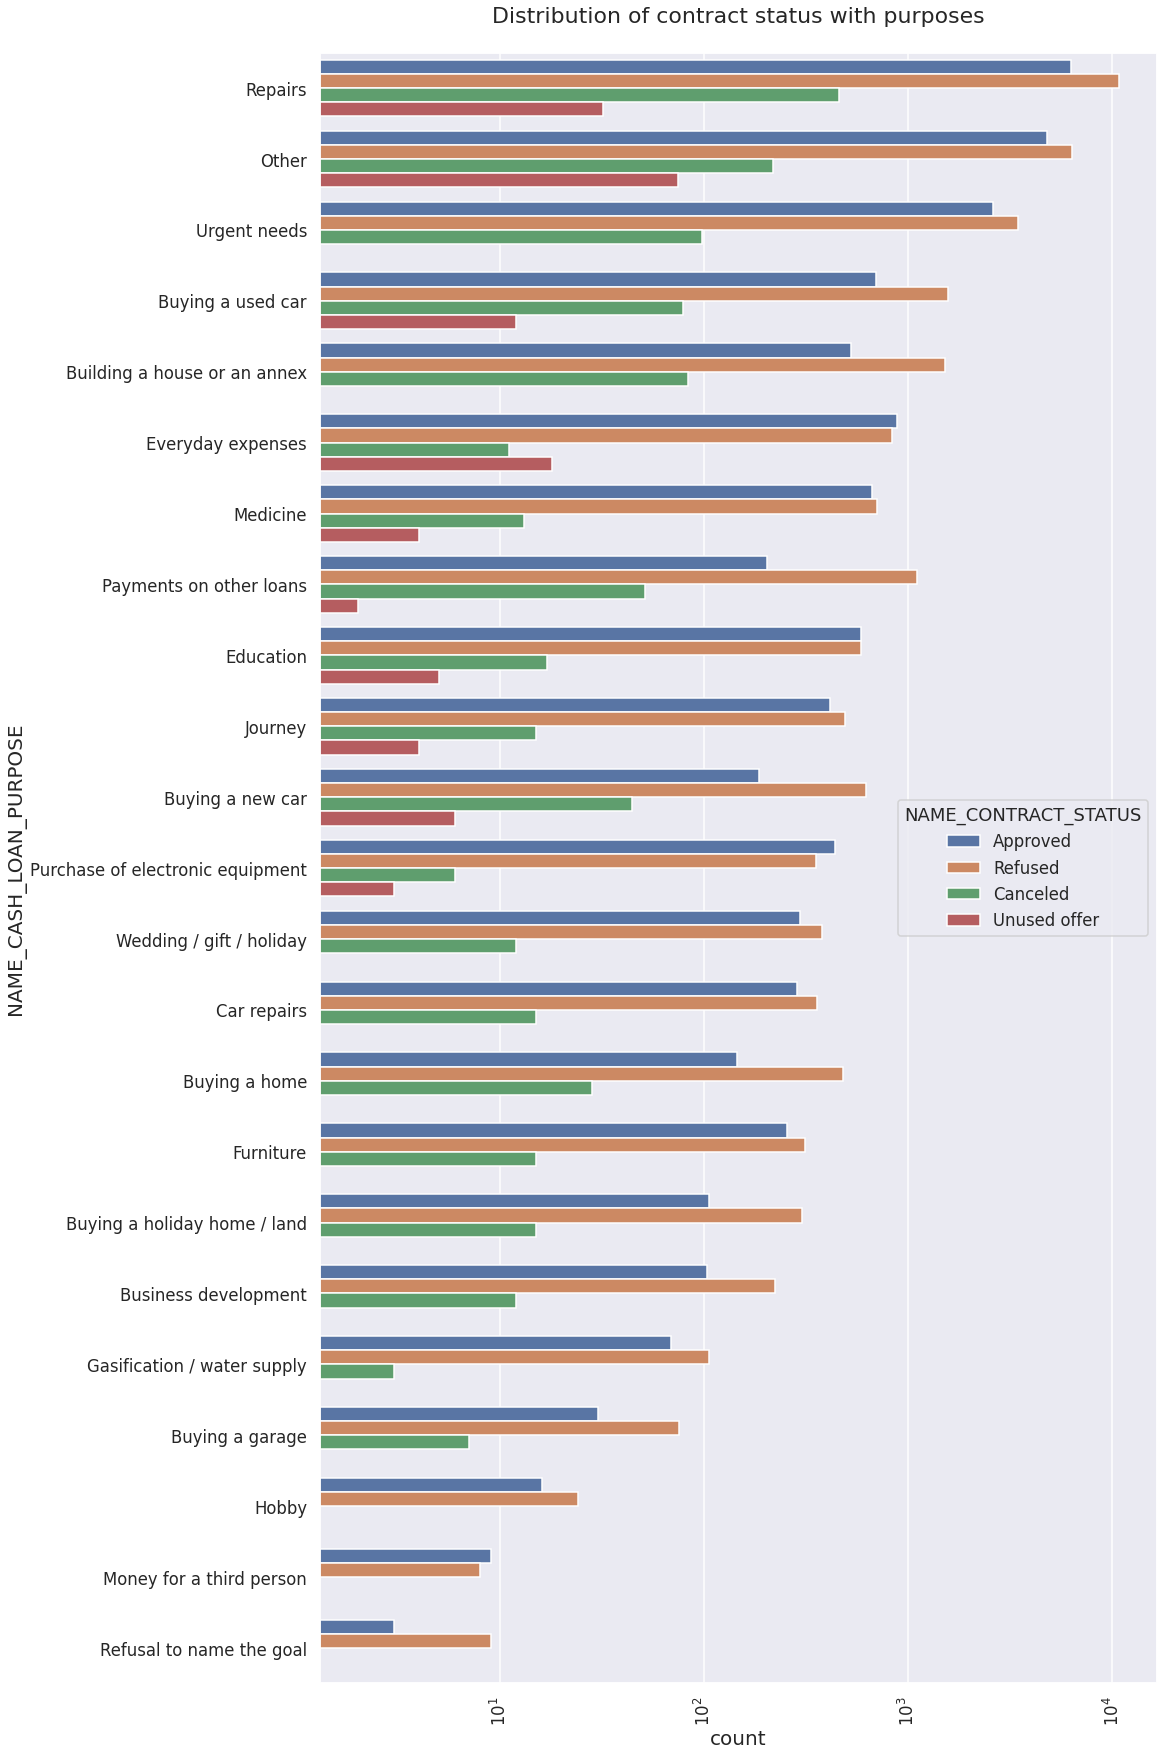

In [95]:
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep') 


1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

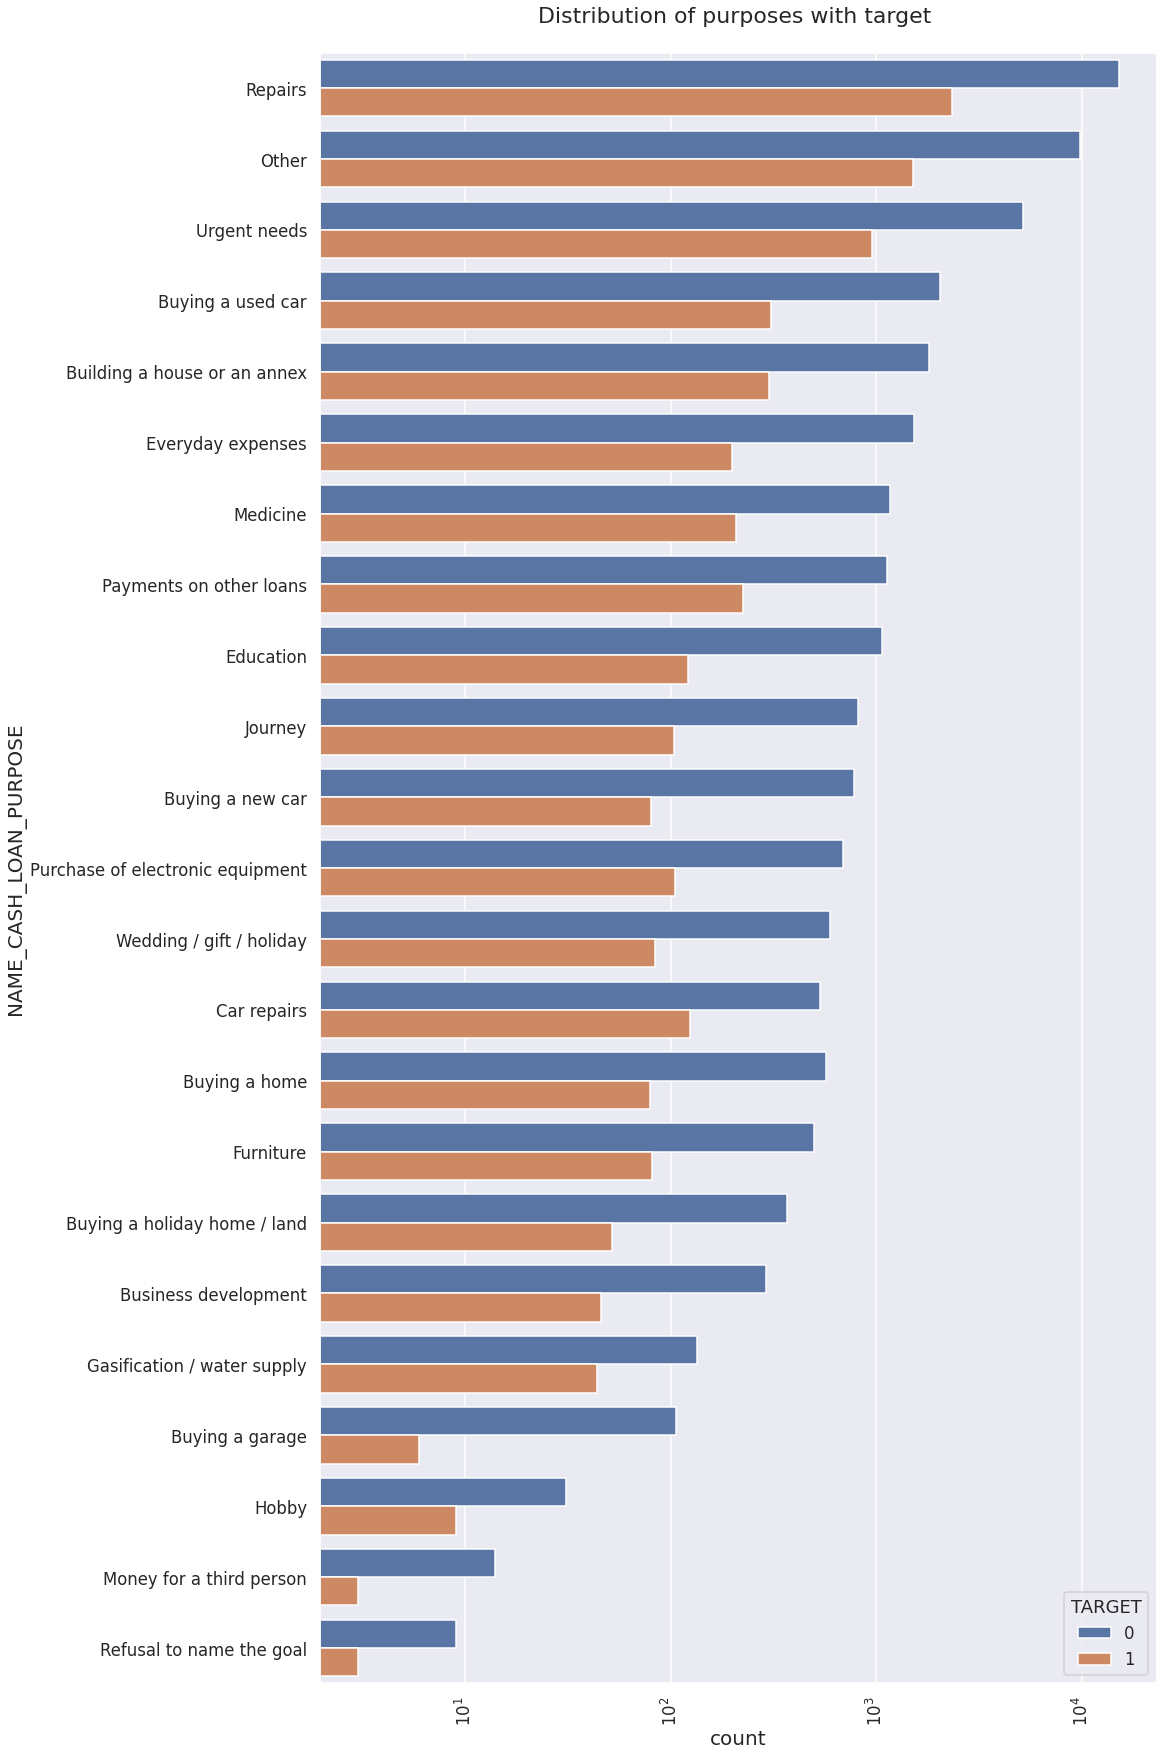

In [96]:
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='deep') 


1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

# **Performing bivariate analysis**

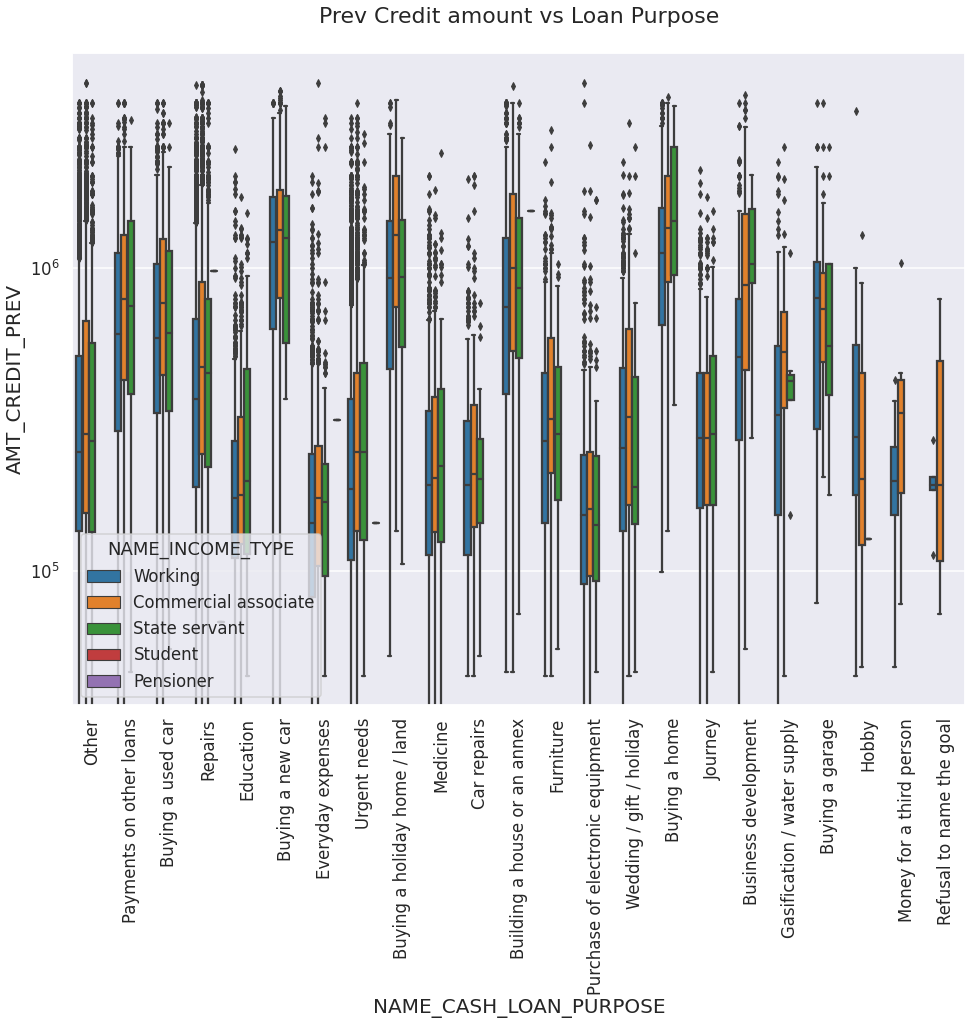

In [97]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

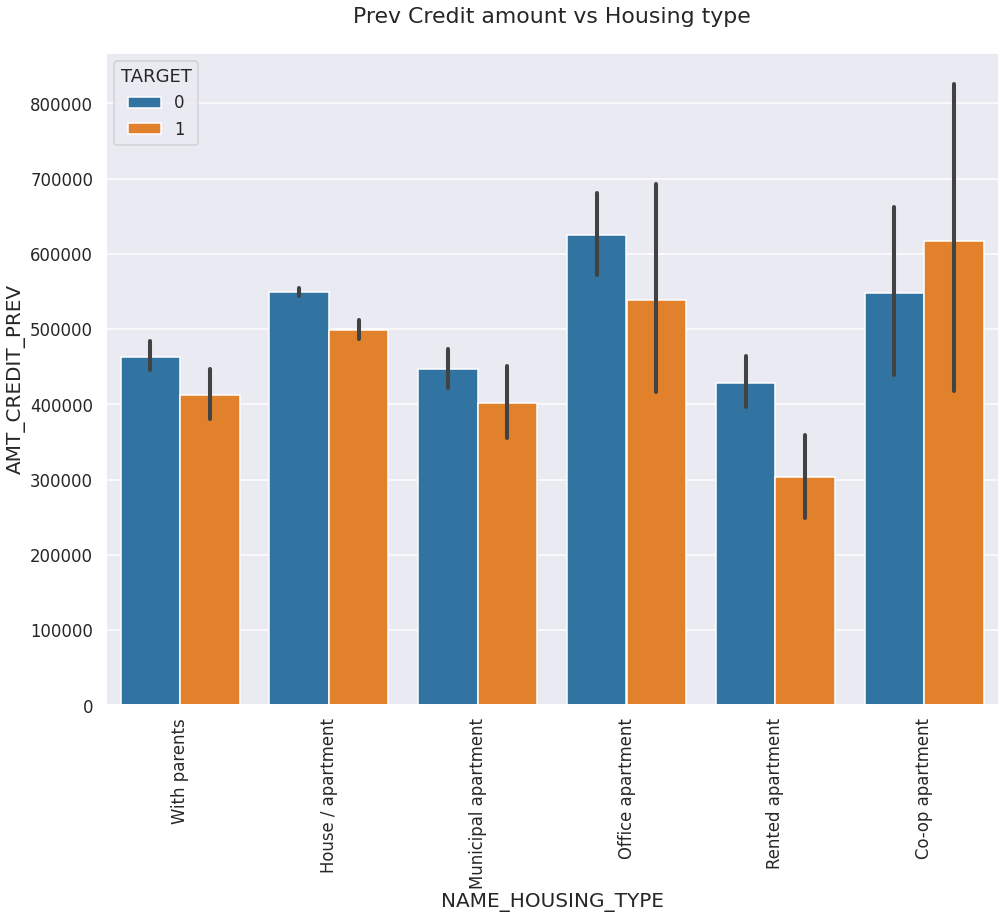

In [98]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.

So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# **CONCLUSION**
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.